# 2. Neural Network Basics - XOR Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
np_xor = np.array(
    [[0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]]
)

X_xor,y_xor = np_xor[:,:2], np_xor[:,2]

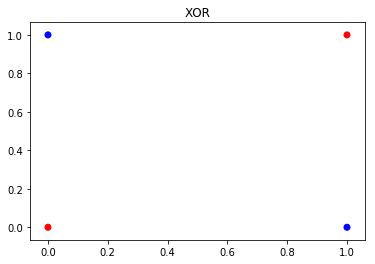

In [3]:
def plot_data(X,y, title):
    colors = ['blue' if label == 1 else 'red' for label in y]
    
    plt.title(title)
    plt.scatter(X[:,0], X[:,1], color=colors)
    return plt

plot_data(X_xor,y_xor, 'XOR').show()

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_xor[:,:2], y_xor, epochs=1000, verbose = 0)

pred = model.predict_proba(X_xor)

print(pred)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


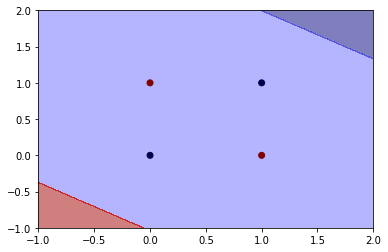

In [17]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    ##fig, ax = subplots()
    plt.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=1)

    return plt

plot_decision_boundary(X_xor,y_xor, model, cmap = 'seismic').show()

In [25]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation="sigmoid"))
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_xor[:,:2], y_xor, epochs=500, verbose = 0)

pred = model.predict_proba(X_xor)

print(pred)

[[0.00524953]
 [0.99202704]
 [0.99199533]
 [0.00848374]]


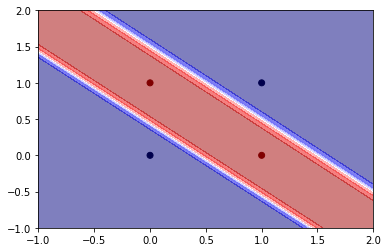

In [26]:
plot_decision_boundary(X_xor,y_xor, model, cmap = 'seismic').show()